# Effect of PCA on the classification of the iris data using Decision Tree

## Without PCA

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

iris=load_iris()

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


### Printing details of the dataset

In [2]:
print('Features: ', iris.data[:5])
print('Feature names: ', iris.feature_names)
print('Feature shape:', iris.data.shape)
print('Target: ', iris.target[:5])
print('Target names:', iris.target_names)
print('Target shape:', iris.target.shape)

Features:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature shape: (150, 4)
Target:  [0 0 0 0 0]
Target names: ['setosa' 'versicolor' 'virginica']
Target shape: (150,)


### Create dataframe using the data

In [3]:
X=iris.data
y=iris.target
df_iris = pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


### Split dataset into train and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


### Create and train Decision Tree

In [5]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [6]:
y_predict = tree.predict(X_test)
y_predict

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

### Print the evaluation metrics of the decision tree

In [7]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [8]:
print('Accuracy is',accuracy_score(y_predict,y_test))

Accuracy is 0.9473684210526315


## Using PCA

### Create PCA object and fit it on the dataset's features

In [9]:
def autolabel(rects): # Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height, '%f' % float(height), ha='center', va='bottom')

[92.46187232  5.30664831  1.71026098  0.52121839]


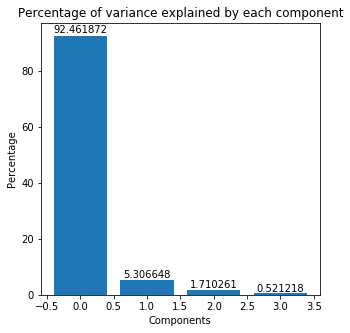

In [10]:
pca = PCA()
pca.fit(X)
pca_vars = pca.explained_variance_ratio_ * 100
print(pca_vars)
fig, ax = plt.subplots(figsize = (5, 5))
bar = plt.bar(np.arange(len(pca_vars)), pca_vars)
autolabel(bar)
plt.title('Percentage of variance explained by each component')
plt.xlabel('Components')
plt.ylabel('Percentage')
plt.show()

Since the 1st Principle Component explains more than 90% variance, we can use just the first component for classification

### Transform the feature space using PCA and take just the first component

In [11]:
X_pca = pca.transform(X)[:, 0]
print(X_pca.shape)

(150,)


### Split the data into train and test sets

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size = 0.25, random_state = 5)

print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(112,) (38,) (112,) (38,)


### Create decision tree and fit it on the new transformed data

In [13]:
tree2 = DecisionTreeClassifier(random_state=123)
tree2.fit(X_train2.reshape(-1, 1), y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [14]:
y_predict = tree2.predict(X_test2.reshape(-1, 1))
y_predict

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2])

### Print the evaluation parameters of the model

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.86      0.86        14
           2       0.83      0.83      0.83        12

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38



In [16]:
print('Accuracy is',accuracy_score(y_predict,y_test))

Accuracy is 0.8947368421052632


## Conclusion

Since we lose some information when we neglect a few components, the accuracy drops.